### Se trata de explorar con estos datos las tecnicas de clasificacion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Select the dataset

In [2]:
import kagglehub
import os

In [3]:
#Mushrooms example
path = kagglehub.dataset_download('uciml/mushroom-classification')

In [4]:
aux = [name for name in os.listdir(path) if ".csv" in name][0]
path = os.path.join(path,aux)
data =  pd.read_csv(path)

In [5]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
y = data['class']  # Columna 'class' como variable objetivo
X = data.drop('class', axis=1)  # Eliminar la columna 'class' del resto de los datos

In [7]:
# Al final si fue necesario necesario representar numericamente los valores categoricos
encoder = LabelEncoder()
# Codificar todas las columnas categóricas 
X = X.apply(encoder.fit_transform)

In [8]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


## Split the dataset into training and testing sets.

In [9]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train the Support Vector Machine model.

In [11]:
# Normalizacion de los datos
#scaler = StandardScaler()
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [13]:
from sklearn.svm import SVC

In [14]:
# Create a list of regularization parameter values
C_values = [0.01, 0.1, 1, 10, 100]

# Create an empty dictionary to store the results
results = {}

# Train SVM models with different C values
for C in C_values:
    svm_model = SVC(C=C, kernel='linear')
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[C] = {
        'model': svm_model,
        'accuracy': accuracy
    }


## Print the results of the classification.

In [15]:
# Print the results of the classification
print("Results of SVM Classification:")
for C, result in results.items():
    print(f"C = {C}, Accuracy: {result['accuracy']:.4f}")


Results of SVM Classification:
C = 0.01, Accuracy: 0.9489
C = 0.1, Accuracy: 0.9582
C = 1, Accuracy: 0.9877
C = 10, Accuracy: 0.9797
C = 100, Accuracy: 0.9895


## Visualize the prediction results

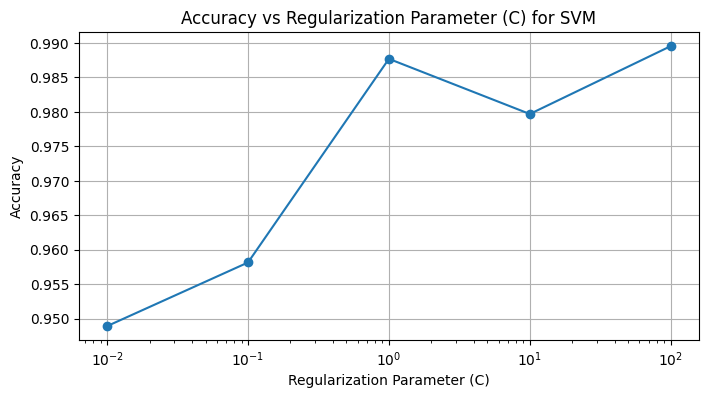

In [17]:
# Visualize the accuracy vs regularization parameter (C)
accuracies = [result['accuracy'] for C, result in results.items()]

plt.figure(figsize=(8, 4))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Regularization Parameter (C) for SVM')
plt.grid(True)
plt.show()